# 1. IMPORTATION DE PACKAGES

In [466]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

# 2. Chargement de donnees 

In [468]:
data = pd.read_csv("USA_Housing.csv")

In [469]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [470]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [471]:
data.shape

(5000, 7)

In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [473]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [474]:
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [475]:
data.drop(['Address'], axis= 1 , inplace= True)

<Axes: >

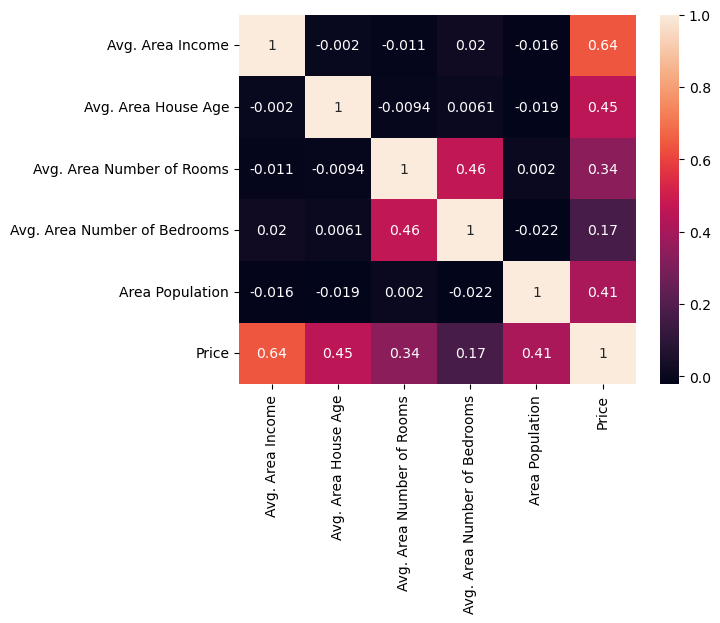

In [476]:
sns.heatmap(data.corr(), annot=True)

In [477]:
data.corr().Price.sort_values(ascending = False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

In [478]:
data[data['Avg. Area House Age'] > 5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [479]:
data['Avg. Area House Age'].min() 

2.644304186036705

In [480]:
data['Avg. Area House Age'].max() 

9.51908806613594

In [481]:
data = data [['Avg. Area House Age', 'Price']]

# 3. Division des données en variables indépendantes et dépendantes

In [483]:
X = data.iloc[:500 , :-1]
y = data.iloc[:500 , -1]

# 4. Separation de donnees 

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [486]:
# Affichage des dimensions
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (400, 1)
y_train: (400,)


In [487]:
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_test: (100, 1)
y_test: (100,)


# Création du modèle
# 5.1 Linear Régression: Régression linéaire

In [489]:
modele_Lineaire = LinearRegression()

In [490]:
modele_Lineaire.fit(X_train, y_train)

LinearRegression()

In [491]:
X_test

,Avg. Area House Age
21,5.551222
239,6.768524
103,6.471674
273,7.188208
22,4.210323
...,...
242,5.201964
141,6.774711
3,7.188236
468,7.002129


In [492]:
y_predicted_lr = modele_Lineaire.predict(X_test)
y_predicted_lr

array([1157199.44357233, 1351500.17360712, 1304118.20852984,
       1418488.46889533,  943170.73229519, 1248678.57006831,
       1459546.18037763, 1017490.63508429, 1413394.53580547,
       1124673.80011104, 1037605.16884542, 1275297.93794473,
       1242775.66701196, 1178211.23307117, 1401251.74156028,
       1193712.31585332, 1121600.4997771 , 1323637.44327745,
        912556.69880162, 1044470.8877708 , 1337267.13645182,
       1531117.57850769, 1104677.35263689, 1400208.26834394,
       1194975.58696262, 1191699.71203621, 1482761.04110061,
       1112668.54909215, 1193475.00752529, 1289649.95775589,
       1226548.6363734 , 1389326.2750282 , 1095699.44013032,
       1454668.13380692, 1375603.94585981, 1381750.75907729,
       1346838.44637323, 1173464.09661709, 1438879.36271232,
       1569964.93750854,  953333.45456004, 1328356.60676785,
       1301286.29600516, 1269857.44076544, 1356363.69004982,
       1154757.21776716, 1053544.29445921,  985645.5033937 ,
       1473583.53264399,

In [493]:
r2_score(y_test, y_predicted_lr)

0.24840523991093277

In [494]:
print("Mean Squared Error:", mean_absolute_error(y_test, y_predicted_lr))
print("R2 Squared :", r2_score(y_test, y_predicted_lr))

Mean Squared Error: 239406.2293092046
R2 Squared : 0.24840523991093277


In [495]:
modele_Lineaire.score(X_test, y_test)

0.24840523991093277

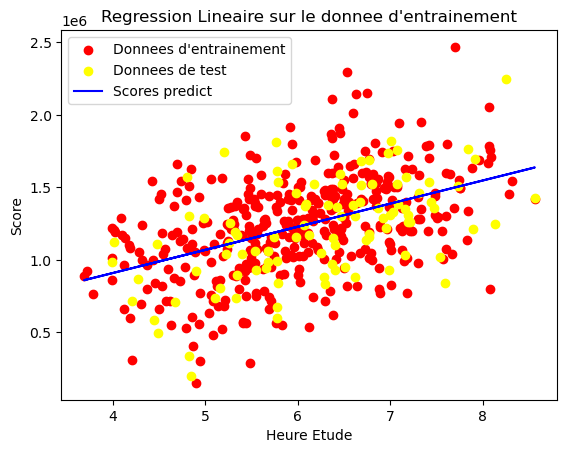

In [496]:
plt.scatter(X_train, y_train, color='red', label="Donnees d'entrainement") 
plt.scatter(X_test, y_test, color='yellow', label="Donnees de test") 
plt.plot(X_train, modele_Lineaire.predict(X_train),color='blue', label="Scores predict")
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Regression Lineaire sur le donnee d'entrainement")
plt.legend()
plt.show()

# modele ramdom

In [498]:
modeleRadom = RandomForestRegressor()

In [499]:
modeleRadom.fit(X_train,y_train)

RandomForestRegressor()

In [500]:
modeleRadom.predict(X_test)

array([ 801988.91818711, 1327082.65776805, 1215443.60273425,
       1068022.03676766,  512838.36293961,  760645.09969601,
       1704634.5318268 , 1043170.56949041, 1464599.11858239,
       1192562.78407324, 1096092.8618526 , 1339957.19108044,
       1112112.80253618,  976812.04966415, 1542062.57235523,
       1352521.41211257, 1041718.68891731, 1896183.38725796,
       1160321.06931618, 1333190.83125472, 1248231.60182562,
       1551730.00657158, 1075859.47155767, 1551660.30517743,
       1404107.58062602,  963629.2555864 , 1270555.00811183,
       1304153.26958243, 1352521.41211257, 1417389.52245844,
       1537189.33824615, 1011244.04465967,  923820.29242593,
       1445754.50599058, 1656110.30650518, 1483077.73059805,
       1728482.11930902, 1144947.78577783, 1394864.83807403,
       1480247.25855807,  948155.01360244, 1746506.91654538,
       1821453.89316512, 1223295.89537164, 1090649.63803441,
       1304728.37556598,  459928.92504425,  884912.55224337,
       1270478.74020827,

In [501]:
r2_score(y_test, y_predicted_lr)

0.24840523991093277

In [502]:
print("Mean Squared Error:", mean_absolute_error(y_test, y_predicted_lr))
print("R2 Squared :", r2_score(y_test, y_predicted_lr))

Mean Squared Error: 239406.2293092046
R2 Squared : 0.24840523991093277


In [555]:
modeleRadom.score(X_test, y_test)

-0.2544857800813436

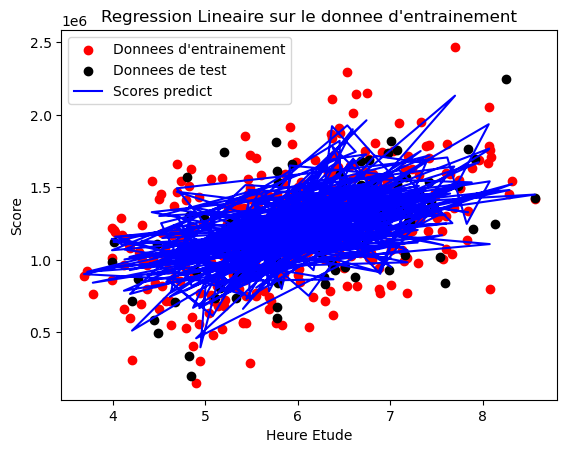

In [504]:
plt.scatter(X_train, y_train, color='red', label="Donnees d'entrainement") 
plt.scatter(X_test, y_test, color='black', label="Donnees de test") 
plt.plot(X_train, modeleRadom.predict(X_train),color='blue', label="Scores predict")
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Regression Lineaire sur le donnee d'entrainement")
plt.legend()
plt.show()

# DECISION TREE

In [506]:
DecisionTree =  DecisionTreeRegressor()

In [507]:
DecisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [508]:
DecisionTree.predict(X_test)

array([ 753652.27184518, 1195986.29883487, 1220276.5513435 ,
       1012262.71165943,  311111.20058677,  534305.13233493,
       1789607.52613989,  874103.66060659, 1629983.84670324,
       1402818.21016585, 1082455.01751124, 1483848.16937598,
       1117432.98005745, 1063423.00726487, 1514349.6921977 ,
       1446756.86276142,  890112.54931789, 2014851.34416151,
       1194709.62785816, 1629098.18171952, 1051123.83309999,
       1637259.99866779, 1115466.58507141, 1514349.6921977 ,
       1446756.86276142,  566896.21232714, 1301881.41652858,
       1363086.90453256, 1446756.86276142, 1417819.74021809,
       1677204.24621442, 1066659.38298835,  861321.58069247,
       1200539.36116778, 1744932.21099093, 1540480.61335358,
       1607161.63714503, 1081150.12548381, 1280669.87346605,
       1707045.72215806, 1057252.5826211 , 2146925.33988866,
       1877402.31972695, 1323952.02742518,  996771.24815077,
       1393746.76046743,  152071.87474956,  839638.46096435,
       1294685.15854701,

In [509]:
r2_score(y_test, y_predicted_lr)

0.24840523991093277

In [510]:
print("Mean Squared Error:", mean_absolute_error(y_test, y_predicted_lr))
print("R2 Squared :", r2_score(y_test, y_predicted_lr))

Mean Squared Error: 239406.2293092046
R2 Squared : 0.24840523991093277


In [511]:
DecisionTree.score(X_test, y_test)

-0.8801722721234113

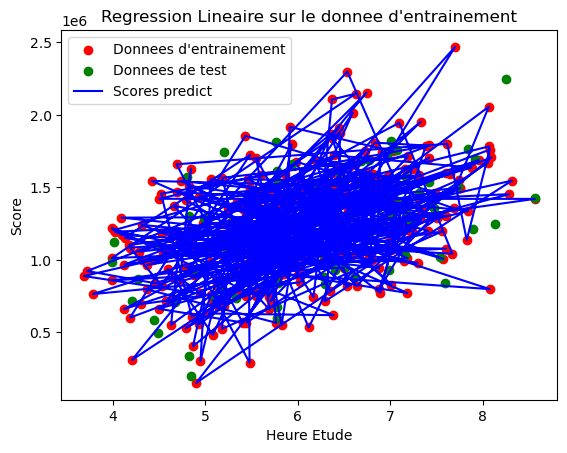

In [512]:
plt.scatter(X_train, y_train, color='red', label="Donnees d'entrainement") 
plt.scatter(X_test, y_test, color='green', label="Donnees de test") 
plt.plot(X_train, DecisionTree.predict(X_train),color='blue', label="Scores predict")
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Regression Lineaire sur le donnee d'entrainement")
plt.legend()
plt.show()